In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('data.arff')
df = pd.DataFrame(data[0])
df.head(5)

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


In [2]:
df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,b'M',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Um',b'Service',b'Housewife',b'Large',b'Average',b'Govt',b'Eng',b'Small',b'Good'
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


<IPython.core.display.Javascript object>


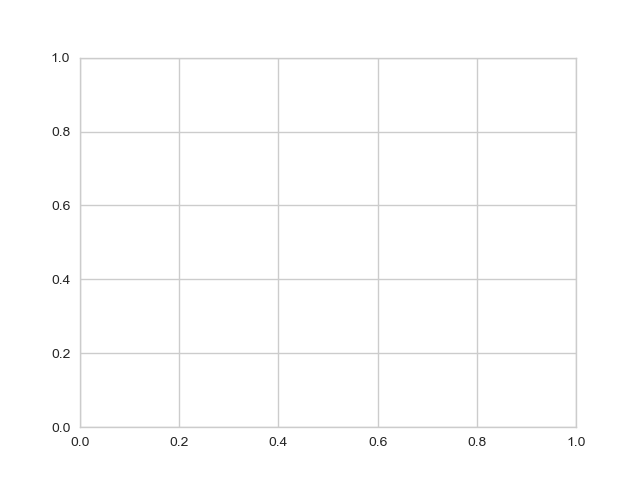

ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

In [22]:
import numpy as np
import pandas as pd
from ipywidgets import interact
%matplotlib notebook
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
df=pd.DataFrame(data[0])


In [60]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC


In [32]:
class_le = LabelEncoder()
for column in df[["ge","cst","tnp","twp","iap","esp","arr","ms","ls","as","fmi","fs","fq","mq","mo","nf","sh","ss","me","tt","atd"]]:
    df[column] = class_le.fit_transform(df[column].values)


In [50]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_data.csv")
df = pd.DataFrame(data[0])
df.head(5)
df.isnull().any()

ge     False
cst    False
tnp    False
twp    False
iap    False
esp    False
arr    False
ms     False
ls     False
as     False
fmi    False
fs     False
fq     False
mq     False
fo     False
mo     False
nf     False
sh     False
ss     False
me     False
tt     False
atd    False
dtype: bool

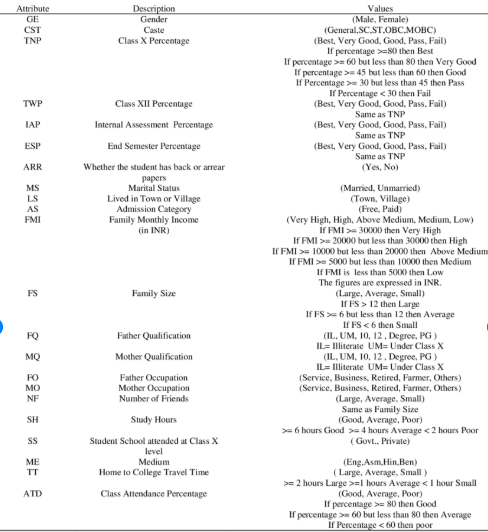

In [49]:
from IPython.display import Image
Image(filename='Capture.png')

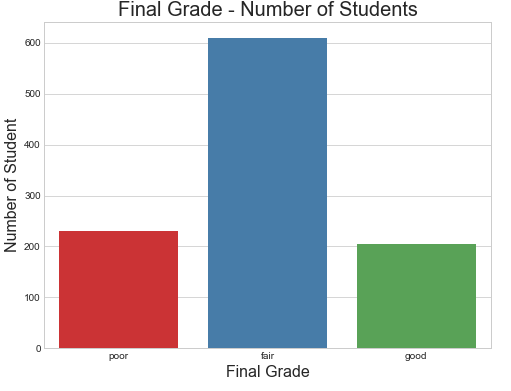

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(df.esp, order=["Best","Vg","Good","Pass","Fail"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

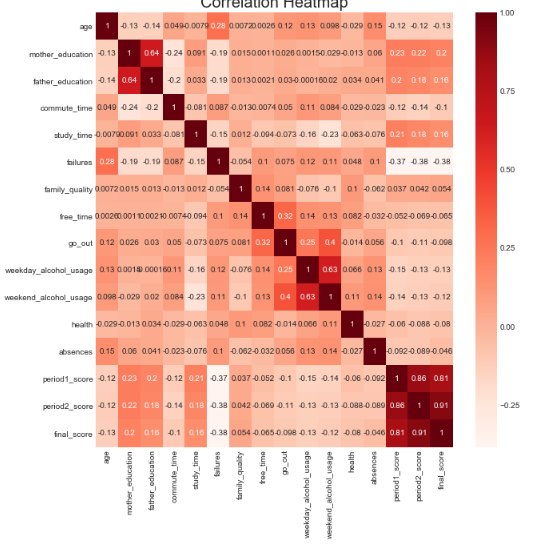

In [54]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)


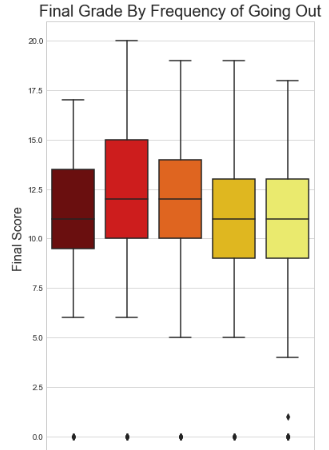

In [55]:
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

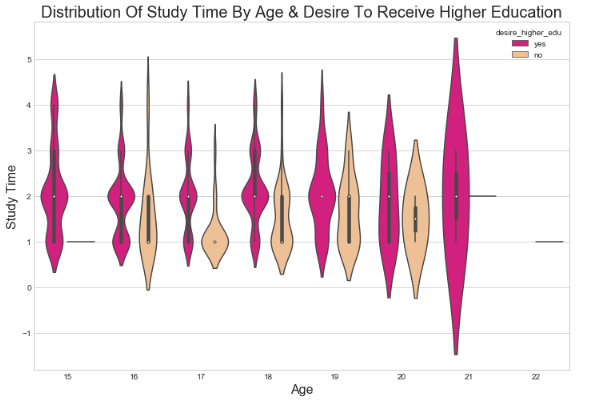

In [57]:
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)


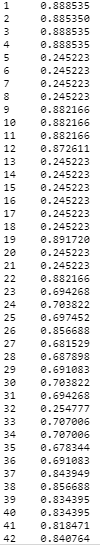

In [59]:
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,42):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))
